<a href="https://colab.research.google.com/github/Antonio24ch/Python-VIsualization/blob/main/Ejercicio_Diagramas_de_Area_Barras_e_Histogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga y preparación de los datos <a id="2"></a>


Importar los Módulos Primarios. Lo primero que haremos será importar dos módulos necesarios para el análisis de datos: _pandas_ y **Numpy**.


In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios

Vamos a descargar e importar el conjunto principal de datos sobre Inmigración en Canadá utilizando el método _pandas_ `read_excel()`. Normalmente, antes de hacerlo, necesitaremos descargar un modulo requerido por _pandas_ para poder leer archivos de Excel. Este modulo es **xlrd**. Para tu comodidad, hemos preinstalado dicho modulo. De no ser así, tendrías que ejecutar la siguiente línea de código para instalar el modulo **xlrd**:

```
!conda install -c anaconda xlrd --yes
```


Descargar el conjunto de datos y asignarlo a un _pandas_ DataFrame


In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Veamos los primeros cinco elementos de nuestro conjunto de datos


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Vamos a encontrar cuantas entradas de datos hay en el conjunto


In [4]:
# imprimir el tamaño del DataFrame
print(df_can.shape)

(195, 43)


Limpiar datos. Haremos algunas modificaciones al conjunto original para facilitar la visualización de estos. Revisar el laboratorio `Introducción a Matplotlib y a las Graficas de Líneas` para una descripción racional y detalladas de los cambios. 


#### 1. Limpiar el conjunto de datos para borrar las columnas que no ofrecen información en nuestra visualización (p. ej. AREA, REG).


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Veamos los primeros cinco elementos para ver como cambió el DataFrame
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Observa como en las columnas Type, Coverage, AREA, REG y DEV han sido removidas del DataFrame


#### 2. Cambiar el nombre de algunas columnas para que tengan sentido.


In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Veamos los primeros cinco elementos para ver como cambió el DataFrame
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Observa como las columnas ahora se entienden mejor, incluso para alguien que las ve por primera vez.


#### 3. Para tener consistencia, asegúrate de que todas las columnas sean del tipo cadena.


In [7]:
# Revisar el tipo de dato de las etiquetas de las columnas
all(isinstance(column, str) for column in df_can.columns)

False

Arriba puedes observar que la línea de código regresa _False_ cuando se comprueba si todas las etiquetas de las columnas son del tipo **cadena**. Cambiemos todas a tipo **cadena**.


In [8]:
df_can.columns = list(map(str, df_can.columns))

# Revisemos el ahora el tipo de dato en los nombres de las columnas
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Establece el nombre del país (country) como índice – muy útil para hacer búsquedas por países utilizando el método .loc


In [9]:
df_can.set_index('Country', inplace=True)

# Veamos los primeros cinco elementos para ver como cambió el DataFrame
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Observa como los nombres de los países funcionan ahora como índices.


#### 5. Agrega un columna para el total.


In [10]:
df_can['Total'] = df_can.sum(axis=1)

# Veamos los primeros cinco elementos para ver como cambió el DataFrame
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Ahora el dataframe tiene una columna adicional que representa el numero total de inmigrantes de cada país desde 1980 a 2013 dentro del conjunto de datos. De esta forma, si imprimimos el tamaño de los datos, obtendremos:


In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Ahora nuestro DataFrame tiene 38 columnas en vez de las 37 que teníamos antes.


In [12]:
# Finalmente, vamos a crear una lista desde los años 1980 a 2013
# esto será de utilidad cuando grafiquemos los datos
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizar los Datos mediante Matplotlib<a id="4"></a>


Importar `Matplotlib` y **Numpy**.


In [13]:
# utilizar el comando inline para generar las imágenes dentro del navegador
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # opcional: para el estilo ggplot

# revisar la última versión de Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


# Diagramas de Area<a id="6"></a>


En el ultimo modulo creamos una grafica lineal para visualizar los primeros 5 países que han contribuido con mas inmigrantes hacia Canadá desde 1980 a 2013. Con un pequeño cambio en el código, podemos visualizar esta grafica acumuladamente, a este tipo de graficas se le conocen como **Grafica de Líneas Apiladas** o **Grafica de Área**.


In [14]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# obtener los primeros 5 países
df_top5 = df_can.head()

# transponer el DataFrame
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Las graficas de área están apiladas por defecto. Para producirlas, cada columna debe tener o todos sus valores positivos o todos negativos (cualquier valor NaN será 0 por defecto). Para crear una grafica no apilada estableceremos `stacked=False`.


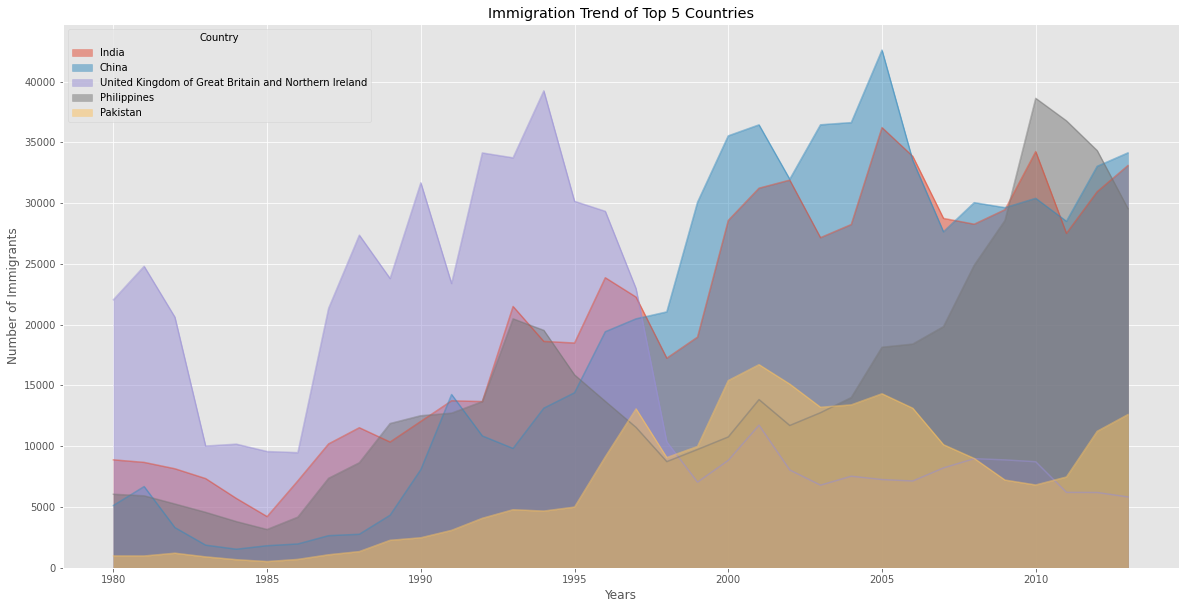

In [15]:
df_top5.index = df_top5.index.map(int) # cambiar el valor de los índices de df_top5 a tipo entero para graficarlos
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pasar el tamaño de tupla (x, y)
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

La grafica sin apilar tiene una transparencia por defecto (valor alpha) en 0.5. Podemos modificar este valor pasando el parámetro `alpha`.


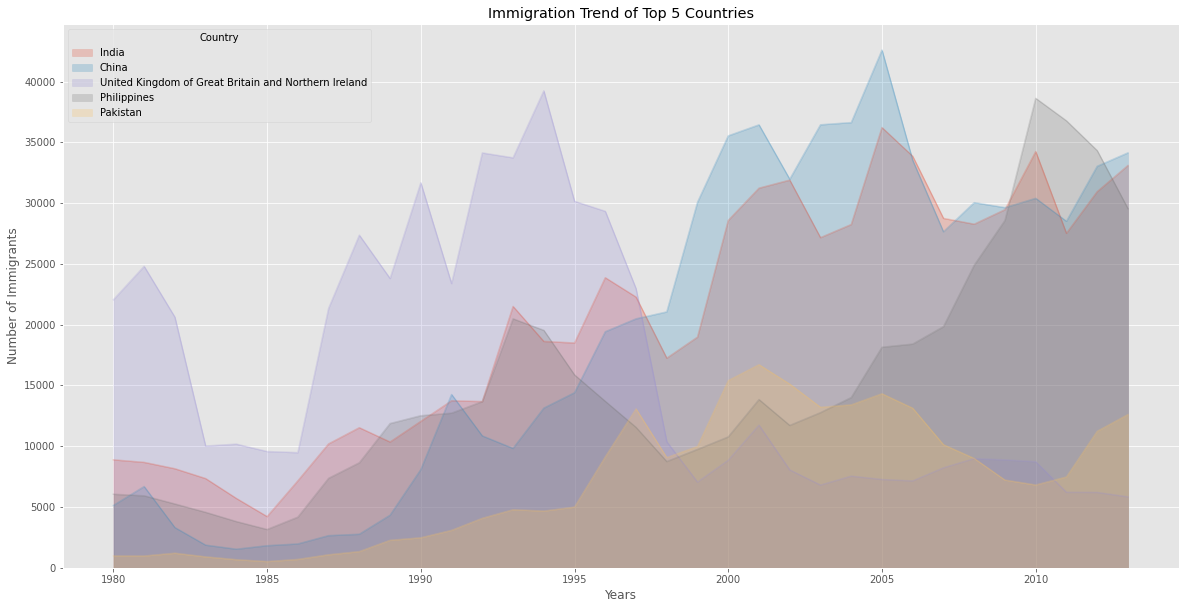

In [16]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, valor por defecto a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Dos tipos de imágenes

Como se discutió en las video sesiones, hay dos estilos/opciones para graficar utilizando `matplotlib`. Una es con la capa de Artista y la otra con la de scripting.

**Opción 1: Capa de Scripting (método procedural) – usando matplotlib.pyplot como 'plt'**

Se puede utilizar `plt`, esto es `matplotlib.pyplot`, y añadir mas elementos llamando a distintos métodos de forma procedural, por ejemplo, , `plt.title(...)` para añadir un titulo o `plt.xlabel(...)` para añadir una etiqueta al eje x.

```python
    # Opción 1: Esto es lo que se ha visto hasta ahora
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


**Opción 2: Capa de Artista (método orientado a objetos) – usando `Axes` en lugar de Matplotlib (preferido) **

Puedes utilizar `Axes` en vez de tu grafica actual y guardarla en una variable (p. ej. `ax`). Puedes añadir mas elementos haciendo llamadas a métodos con pocas modificaciones en la sintaxis (añadiendo "_set\__" al método anterior). Por ejemplo, utiliza `ax.set_title()` en vez de `plt.title()` para añadir un titulo, o `ax.set_xlabel()` en lugar de `plt.xlabel()` para añadir una etiqueta al eje x.

Esta opción a veces es mas clara y flexible en gráficos avanzados (en particular teniendo graficas múltiples, como se verá mas adelante)

En este curso nos apegaremos a la **capa de scripting** excepto en algunas visualizaciones avanzadas donde haremos uso de la **capa de artista** para manipular aspectos avanzados de las imágenes.


Text(0.5, 0, 'Years')

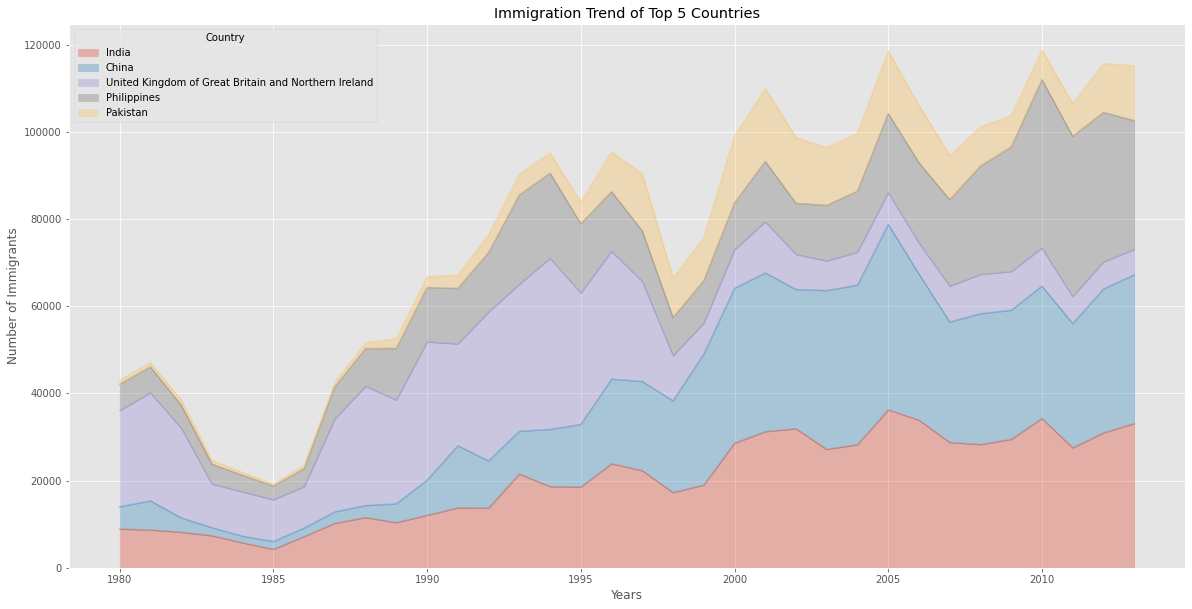

In [17]:
# opción 2: opción preferida y mas flexible
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Pregunta**: Utiliza la capa de scripting para crear una grafica de área de los 5 países que menos contribuyen con inmigración en Canadá **desde** 1980 hasta 2013. Utiliza un valor de transparencia de 0.45. 


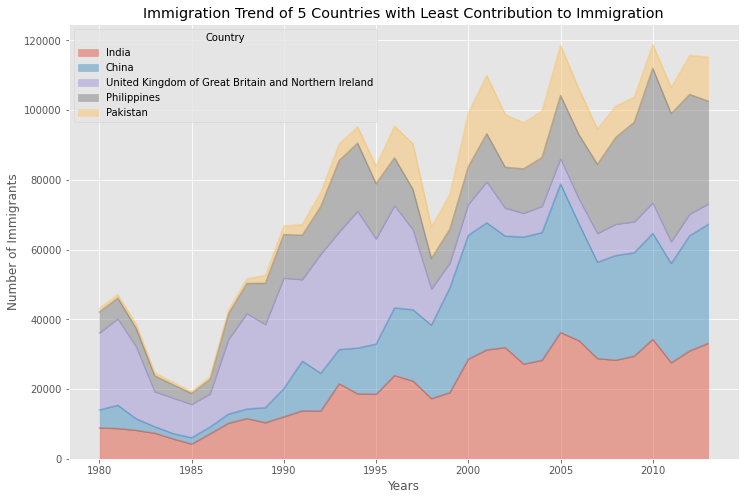

In [18]:
### Escribe aquí tu respuesta
df_least5= df_can.head(5) #head porque ya están ordenanos de manera ascendente

df_least5 = df_least5[years].transpose()


df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, figsize=(12, 8)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

**Pregunta**: Utiliza la capa de artista para crear una grafica de área no apilada de los 5 países que menos contribuyen con inmigración en Canadá **desde** 1980 hasta 2013. Utiliza un valor de transparencia de 0.55.


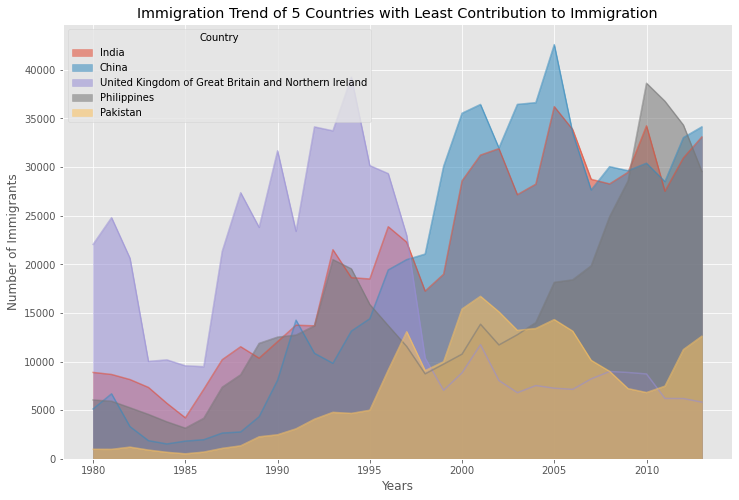

In [19]:
### Escribe aquí tu respuesta
ax = df_least5.plot(kind='area', stacked=False, alpha=0.55, figsize=(12, 8)) 

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()



# Histogramas<a id="8"></a>

Un histograma representa la distribución de _frecuencia_ de un conjunto de datos numéricos. La forma en que trabaja es dividiendo el eje x en _contenedores_ y asignando cada dato dentro del conjunto a uno de ellos para después contar el numero de datos asignado a cada contenedor. De esta forma el eje y es la frecuencia o el numero de datos en cada contenedor. Observa que el tamaño de los contenedores podemos cambiarlo y en ocasiones hay que ajustarlos para que la distribución se muestre de forma clara.


**Pregunta:** ¿Cuál es la distribución de frecuencias de la cantidad de inmigrantes provenientes de distintos países hacia Canadá en 2013?


Antes de continuar con la creación del histograma, examinemos primero la división de los datos en intervalos. Para esto, usaremos el método `histrogram` de **Numpy** para obtener el rango de los contenedores y el conteo de frecuencias de la siguiente manera:


In [20]:
# revisar rapidamente los datos de 2013 
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [21]:
# np.histogram regresa 2 valores
count, bin_edges = np.histogram(df_can['2013'])

print(count) # conteo de las frecuencias
print(bin_edges) # rango de los contenedores, por defecto son 10 contenedores

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Por defecto, el método `histrogram` divide el conjunto de datos en 10 contenedores. La imagen de abajo resume los rangos de los contenedores y la distribución de frecuencias sobre inmigración en 2013. Podemos observar que en 2013:

-   178 países aportaron entre 0 y 3412.9 inmigrantes
-   11 países aportaron entre 3412.9 y 6825.8 inmigrantes
-   1 país aportó entre 6285.8 y 10238.7 inmigrantes, y así sucesivamente

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod2Fig1-Histogram.JPG" align="center" width=800>


Podemos graficar fácilmente este distribución pasando `kind=hist` a `plot()`.


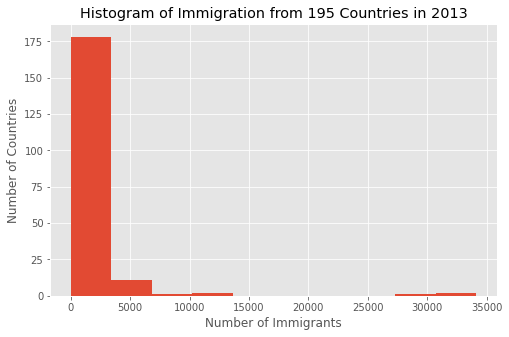

In [22]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # añade un titulo al histograma
plt.ylabel('Number of Countries') # añadir etiqueta de y
plt.xlabel('Number of Immigrants') # añadir etiqueta de x

plt.show()

Obsérvese que las etiquetas del eje x no corresponden con el tamaño del contenedor. Esto se soluciona pasando una palabra `xticks` que contenga la lista de los tamaños de los contenedores como se explica a continuación:


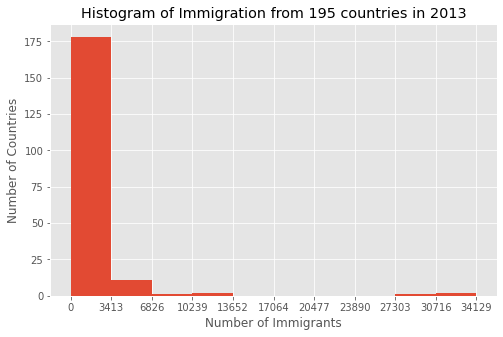

In [23]:
# 'bin_edges' es una lista de los intervalos de los contenedores 
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # añade un titulo al histograma
plt.ylabel('Number of Countries') # añadir etiqueta de y
plt.xlabel('Number of Immigrants') # añadir etiqueta de x

plt.show()

_Observación:_ Podriamos usar `df_can['2013'].plot.hist()`. De hecho, a lo largo de esta lección, utilizar `algun_dato.plot(kind='type_plot', ...)` equivale a `algun_dato.plot.type_plot(...)`. Esto es, pasar el tipo de grafica como argumento o método tiene el mismo resultado.

Revisar la documentación de _pandas_ para mas información [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


También podemos graficar múltiples histogramas en la misma imagen. Por ejemplo, tratemos de resolver las siguientes preguntas mediante un histograma.

**Pregunta**: ¿Cual es la distribución de la inmigración en Dinamarca, Noruega y Suecia desde 1980 a 2013?


In [24]:
# veamos rapidamente el conjunto de datos
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140


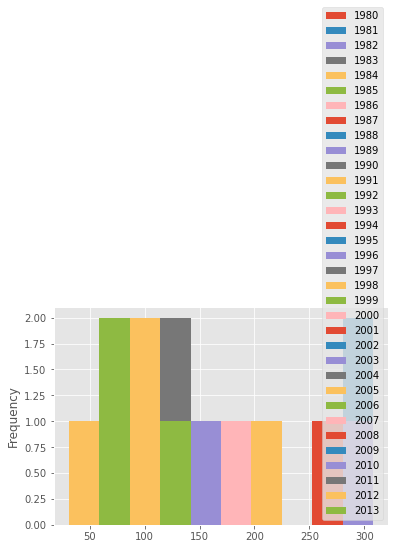

In [25]:
# generar el histograma 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

¡Eso no parece estar correcto!

No te preocupes, a menudo encontrarás situaciones como esta al crear las graficas. A veces la solución radica en como esta estructurado desde su base el conjunto de datos.

En vez de graficar la distribución de frecuencias de la población para los 3 países, _pandas_ lo hizo basándose en los `años`.

Esto se puede solucionar fácilmente transponiendo primero el conjunto de datos, y después graficando como se muestra a continuación.


In [26]:
# transponer DataFrame
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


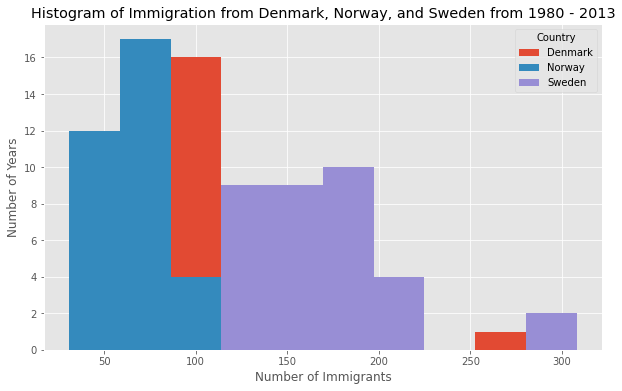

In [27]:
# generar el histograma
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Hagamos unas pocas modificaciones para mejorar el impacto y la estética de la grafica anterior:

-   Incrementar el tamaño de contenedor a 15 pasando el parámetro `bins`
-   establecer una transparencia del 60% con el parámetro `alpha`
-   etiquetar el eje x con el parámetro `x-label`
-   cambiar el color de las graficas con el parámetro `color`


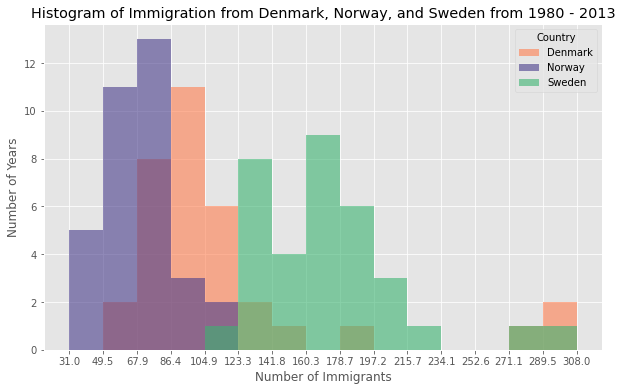

In [28]:
# obtener los valores de x
count, bin_edges = np.histogram(df_t, 15)

# histograma no apilado
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
Para obtener una lista completa de los colores disponibles en Matplotlib ejecuta el siguiente comando en el Shell de Python:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


Si no queremos que las graficas se solapen entre ellas, podemos apilarlas con el parámetro `stacked`. Ajustemos también las etiquetas mínimas y máximas del eje x para retirar el espacio extra de los bordes de la grafica. Podemos pasar una tupla (min, max) con el parámetro `xlim` como se muestra a continuación.


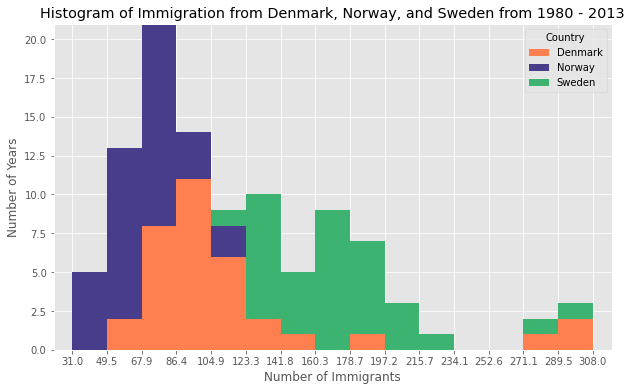

In [29]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  El valor del primer contenedor es 31.0, se añade un buffer de 10 con propósitos estéticos 
xmax = bin_edges[-1] + 10  #  El valor del último contenedor es 308.0, se añade un buffer de 10 con propósitos estéticos

# Histograma apilado
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**Pregunta**: Utiliza la capa de scripting para mostrar de distribución de inmigración de Grecia, Albania y Bulgaria para los años 1980 – 2013. Usa una grafica superpuesta de 15 barras o contenedores y un valor de transparencia de 0.35.


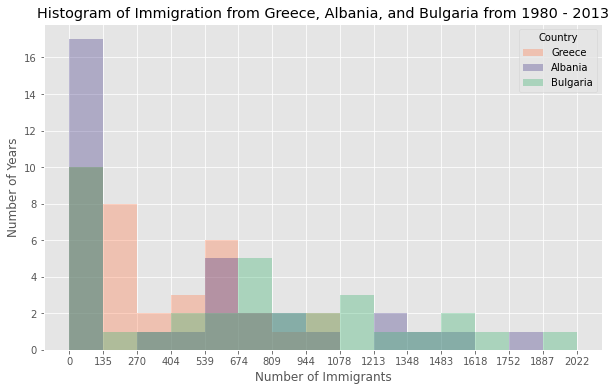

In [30]:
### Escribe aquí tu respuesta

df_n = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

df_n = df_n.transpose() 

count, bin_edges = np.histogram(df_n, 15)

df_n.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()



# Diagramas de Barras (Dataframe) <a id="10"></a>

La grafica de barras es una manera de representación de datos donde la _longitud_ de las barras muestran la magnitud/tamaño de una característica/variable. Estas graficas usualmente representan de forma numérica y por categoría, variables agrupadas en intervalos.

Para crear una grafica de barras tenemos que pasar uno o dos argumentos mediante el parámetro `kind` en la función `plot()`:

-   `kind=bar` crea una grafica de barras _verticales_ 
-   `kind=barh` crea una grafica de barras _horizontales_ 


**Grafica de Barras Verticales**

En las graficas de barras verticales, el eje x se usa para el etiquetado y la longitud de las barras en el eje y corresponde a la magnitud de la variable utilizada. Estas graficas son particularmente útiles en el análisis para series de datos de tiempo. Una desventaja es que carecen de espacio para añadir una etiqueta al pie de cada barra.

**Empecemos analizando el efecto de la Crisis Financiera de Islandia:**

De 2008 a 2011 la crisis financiera de Islandia fue el mayor evento económico y político de ese país. En relación con el tamaño de su economía, el colapso de sistema bancario de Islandia fue el mas grande experimentado por cualquier en la historia de la economía. La crisis llevó a una severa depresión económica de 2008 a 2011 y una significante agitación política.

**Pregunta:** Comparemos el numero de inmigrantes Islandeses a Canadá durante el periodo de 1980 a 2013.


In [31]:
# paso 1: obtener los datos
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

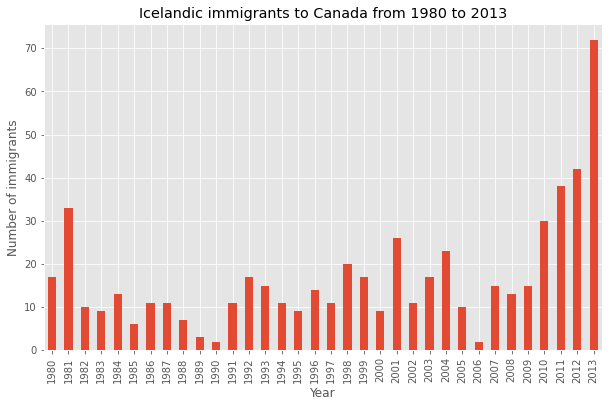

In [32]:
# paso 2: graficar los datos
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # añadir etiquetado al eje x de la grafica
plt.ylabel('Number of immigrants') # añadir etiquetado al eje y de la grafica
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # añadir un titulo a la grafica

plt.show()

La grafica de barras de arriba muestra el numero total de inmigrantes divididos por año. Podemos ver claramente el impacto de la crisis financiera; el numero de inmigrantes hacia Canadá comenzó a incrementarse rápidamente después de 2008.

Anotemos esto en la grafica usando el método `annotate` de la **capa de scripting** o la **interfaz pyploy**. Pasaremos los siguientes parámetros:

-   `s`: str, el texto de la anotación.
-   `xy`: Tupla para especificar el punto (x,y) a ser anotado (en este caso, el punto final de la flecha).
-   `xytext`: Tupla para especificar el punto (x,y) donde colocar el texto (en este caso, el punto inicial de la flecha)
-   `xycoords`: El sistema de coordenadas xy dado - 'data' utiliza el sistema de coordenadas del objeto a ser anotado (por defecto).
-   `arrowprops`: Toma un diccionario de propiedades para dibujar la flecha:
    -   `arrowstyle`: Especifica el estilo de la flecha, `'->'` es la flecha estandar.
    -   `connectionstyle`: Especifica el tipo de conexión. `arc3` es una línea recta.
    -   `color`: Especifica el color de la flecha.
    -   `lw`: Especifica el ancho de la flecha.

Se recomienda leer la documentación de Matplotlib para mas detalles sobre las anotaciones: 
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


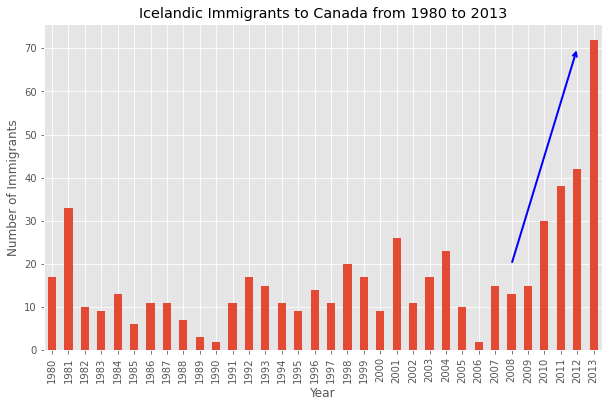

In [33]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # Rota las barras 90 grados

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# flecha de la anotación
plt.annotate('',                      # s: str. Se dejará en blanco si no hay texto
             xy=(32, 70),             # ubicará la cabeza de la flecha en el punto (año 2012, pob 70)
             xytext=(28, 20),         # ubicará la base de la flecha en el punto (año 2008, pob 20)
             xycoords='data',         # Usará el sistema de coordenadas del objeto a ser anotado 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Anotemos el texto que ira sobre la flecha. Pasaremos los siguientes parámetros adicionales:

-   `rotation`: Angulo de rotación del texto dado en grados (al revés de las manecillas del reloj)
-   `va`: alineación vertical del texto [‘centro’ | ‘arriba’ | ‘abajo’ | ‘fondo’]
-   `ha`: alineación horizontal del texto [‘centro’ | ‘derecha’ | ‘izquierda’]


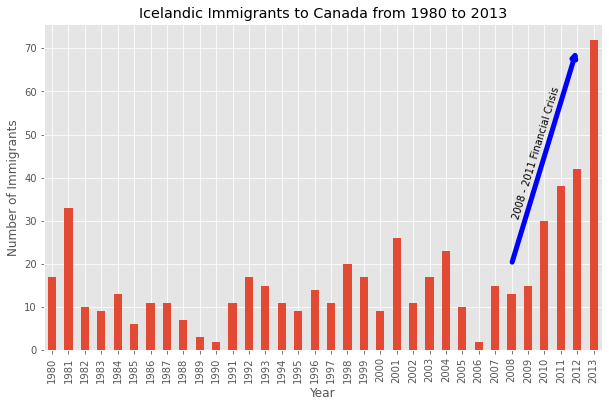

In [34]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# flecha de la anotación
plt.annotate('',                      # s: str. Se dejará en blanco si no hay texto
             xy=(32, 70),             # ubicará la cabeza de la flecha en el punto (año 2012, pob 70)
             xytext=(28, 20),         # ubicará la base de la flecha en el punto (año 2008, pob 20)
             xycoords='data',         # Usará el sistema de coordenadas del objeto a ser anotado 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=5)
            )

# texto de la anotación
plt.annotate('2008 - 2011 Financial Crisis', # texto a mostrarse 
             xy=(28, 30),                    # empieza el texto en el punto (año 2008, pob 30)
             rotation=73,                  # basado en prueba y error para igualar la flecha
             va='bottom',                    # el texto se alineara verticalmente 'abajo'
             ha='left',                      # el texto se alineara horizontalmente a la 'izquierda'
            )

plt.show()

**Grafica de Barras Horizontales**

Algunas veces es mas practica representar los datos horizontalmente, en especifico si se necesita mas espacio para el etiquetado de las barras. En las graficas horizontales, el eje y es utilizado para añadir etiquetas, y la longitud de las barras en el eje x corresponden a la magnitud de la variable usada. Como podrás ver mas a delante, hay mas espacio en el eje y para las etiquetas de las categorías.

**Pregunta:** Al utilizar la capa de scripting y el conjunto de datos `df_can`, se crea una grafica de barras _horizontales_ que muestra el numero _total_ de inmigrantes en Canadá proveniente de los 15 países que mas aportan para el periodo de 1980 a 2013. Etiqueta cada país con el numero total de inmigrantes.


Paso 1: Obtener los datos de los 15 países principales


In [35]:

df_can.sort_values(by='Total', ascending=True, inplace=True)


df_top15 = df_can['Total'].tail(15)
df_top15.to_frame()



,Total
Country,
Romania,93585
Viet Nam,97146
Jamaica,106431
France,109091
Lebanon,115359
Poland,139241
Republic of Korea,142581
Sri Lanka,148358
Iran (Islamic Republic of),175923


Paso 2: Graficar los datos:

1.  Utiliza `kind='barh'` para generar un grafica con barras horizontales.
2.  Asegúrate de elegir un buen tamaño para la grafica, etiquetar los ejes y darle un nombre o titulo.
3.  Interactúa a través de los países y anota la población inmigrante usando la función de anotado en la interface de scripting.


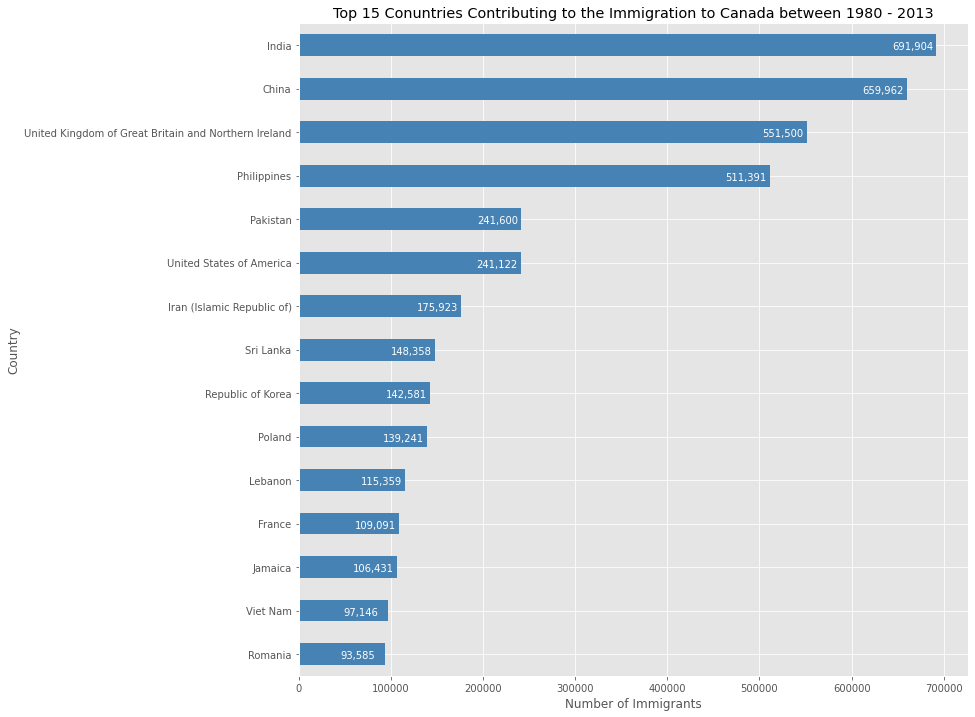

In [36]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 48000, index - 0.1), color='white')

plt.show()

### ¡Gracias por terminar este laboratorio!

Este cuaderno fue creado por [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) con la colaboración de [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), y [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Este cuaderno fue recientemente renovado por Alex Aklson. Espero que hayas encontrado esta sesión interesante. ¡Por favor contáctame si tienes alguna pregunta!
